In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import kurtosis, skew
from statsmodels.tsa.stattools import adfuller

import scipy.stats as st
from scipy.stats import shapiro
import warnings
warnings.filterwarnings("ignore")

In [68]:
data = pd.read_csv('Homework_1_DATA.csv', sep = ";", decimal = ",")
series1 = data.iloc[:300,0]
series2 = data.iloc[:200,1]
series3 = data.iloc[:200,2]
series4 = data.iloc[:200,3]
series5 = data.iloc[:200,4]
series6 = data.iloc[:2000,5]

In [69]:
def plot_graphs(y, num_lags, acf_only=None):
    if not acf_only:
        plt.plot(y)
        plt.show()
    plot_acf(y,lags=num_lags)
    plt.show()
    plot_pacf(y,lags=num_lags,method="ols")
    plt.show()

In [70]:
def statistics(y): 
    # Basic statistics
    mean = np.mean(y)
    std = np.std(y)
    kur = kurtosis(y)
    skewness = skew(y)
    return {'mean': mean, 'std': std, 'kur': kur, 'skewness': skewness}

In [71]:
def adf(y):
    # Ho: the process is not stationary. We need, at least, a unit root
    # H1: the process is stationary. We have to check different models (lags)
    adf_test = adfuller(y,maxlag=10) 
    print("ADF test for the original series")
    print("Statistic Value:" , adf_test[0])
    print("p-value:" , adf_test[1])

In [72]:
import scipy.stats as st
import seaborn as sns
def hist(y, mean, std):
    mu = np.mean(y)
    sigma = np.std(y)
    x = np.linspace(mu -5*sigma, mu +5*sigma, 1000)
    pdf = st.norm.pdf(x, mu, sigma)
    ax = plt.plot(x, pdf, lw = 2, color = "g")
    ax = plt.hist(y,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
    ax = sns.distplot(y, hist = False, kde = True,
                     kde_kws = {'linewidth': 2}, color = "blue")
    ax.set_xlim(mean - 5*std, mean + 5*std)
    
    plt.show()

In [73]:
from scipy.stats import shapiro
def shap(y):
    # Normality test
    saphiro = shapiro(y)
    
    print("Saphiro",saphiro)

In [74]:
import statsmodels.api as sm
def box_test(y, lags):
    #Correlation test
    result = sm.stats.acorr_ljungbox(y, lags=[lags])
    return result

# Series 4

In [75]:
y = series4

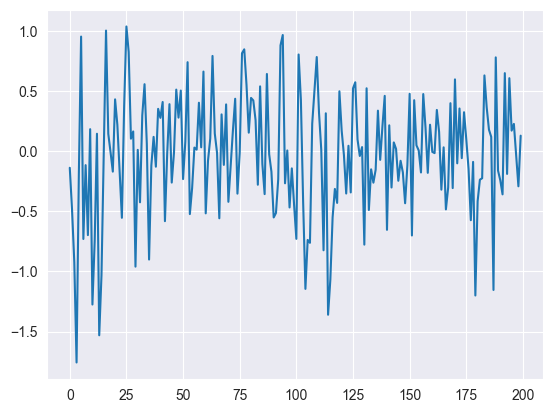

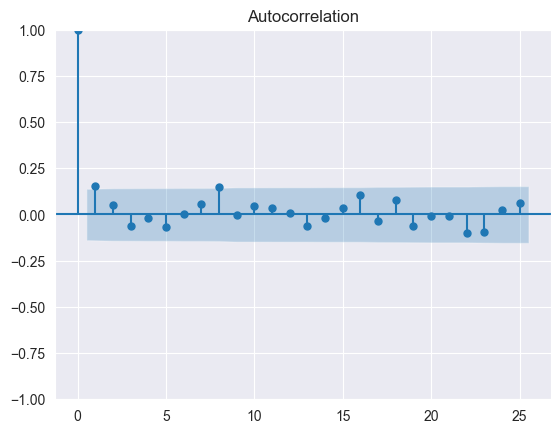

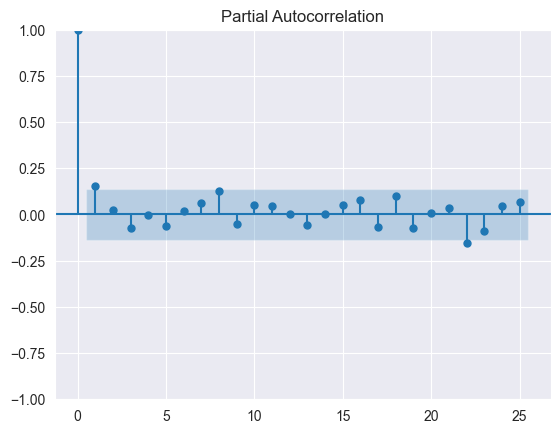

In [76]:
plot_graphs(y, 25)

In [77]:
stats = statistics(y)
stats

{'mean': -0.03206,
 'std': 0.500573917019255,
 'kur': 0.5098687494917451,
 'skewness': -0.48020706258979906}

In [78]:
adf(y)

ADF test for the original series
Statistic Value: -12.007153654203096
p-value: 3.2438534047734954e-22


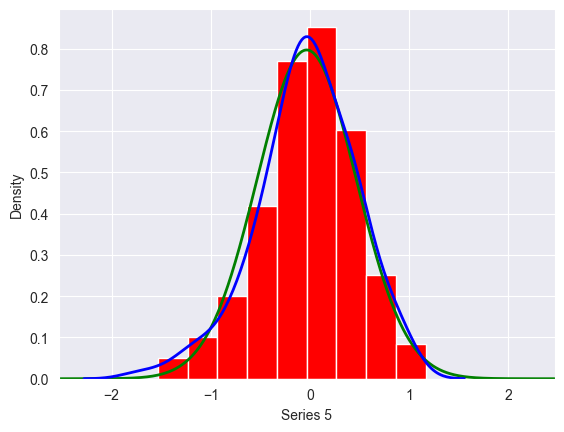

In [79]:
hist(y, mean=stats['mean'], std=stats['std'])

In [80]:
shap(y)

Saphiro ShapiroResult(statistic=0.9836111664772034, pvalue=0.01984090358018875)


In [81]:
box_test(y, 20)

,lb_stat,lb_pvalue
20,19.50123,0.489493


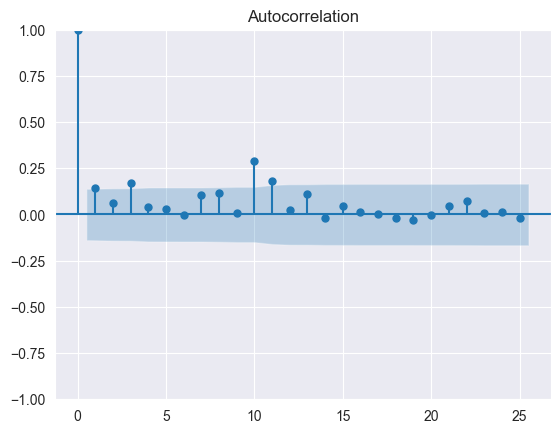

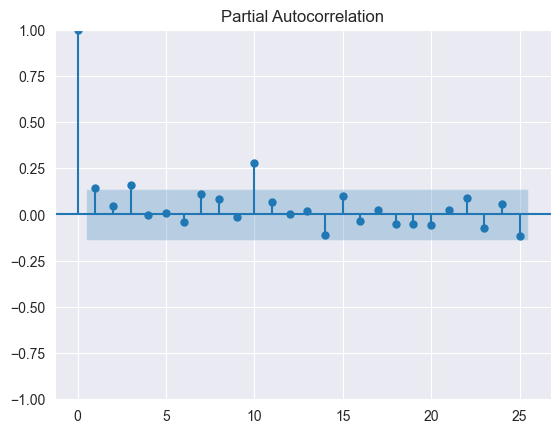

In [82]:
plot_graphs(y**2, 25, acf_only=True)

In [83]:
box_test(y**2, 20)

,lb_stat,lb_pvalue
20,44.962343,0.001117


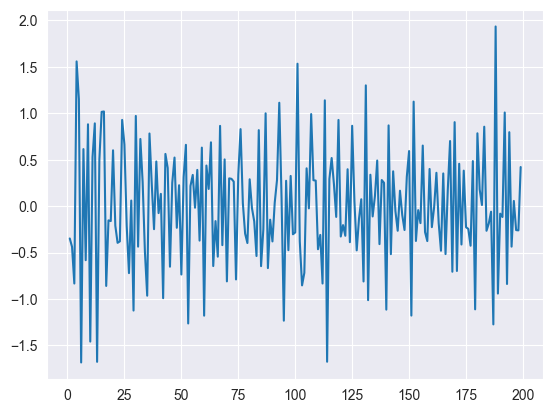

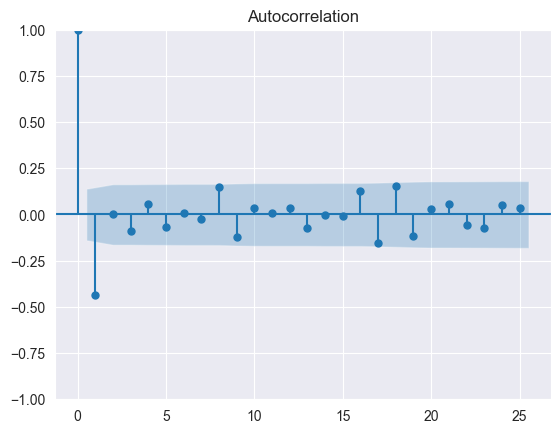

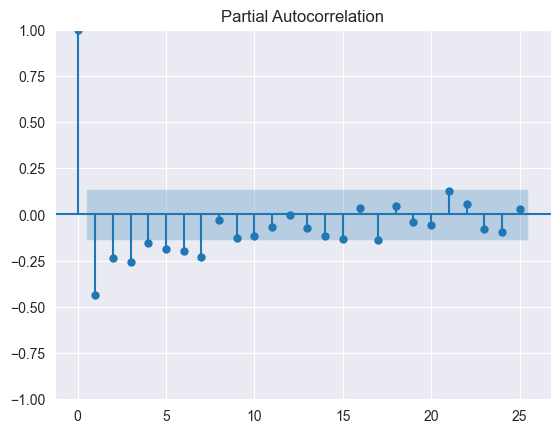

In [84]:
z = y.diff().dropna()
plot_graphs(z, 25)

In [85]:
stats = statistics(z)
stats

{'mean': 0.0013417085427135707,
 'std': 0.6523836570600853,
 'kur': -0.044665505026729946,
 'skewness': -0.040595484976154006}

In [86]:
adf(z)

ADF test for the original series
Statistic Value: -7.804137631278835
p-value: 7.35838196834154e-12


In [87]:
print('Ljung-Box for z')
box_test(z,20)

Ljung-Box for z


,lb_stat,lb_pvalue
20,68.558711,3.125638e-07


In [88]:
print("Ljung-Box for z**2")
box_test(z**2, 20)

Ljung-Box for z**2


,lb_stat,lb_pvalue
20,23.878859,0.247724


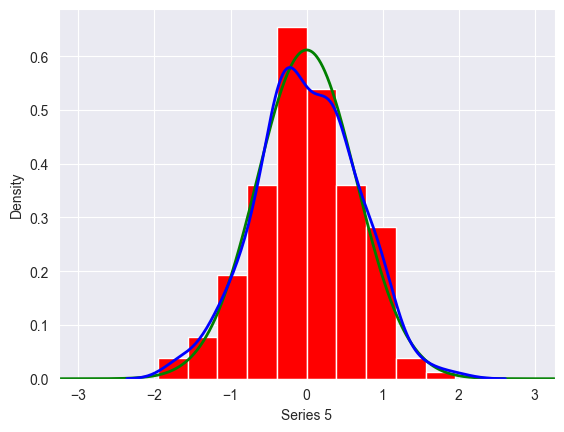

In [89]:
hist(z,mean=stats['mean'], std=stats['std'])

In [90]:
shap(z)

Saphiro ShapiroResult(statistic=0.9949080348014832, pvalue=0.7396892309188843)


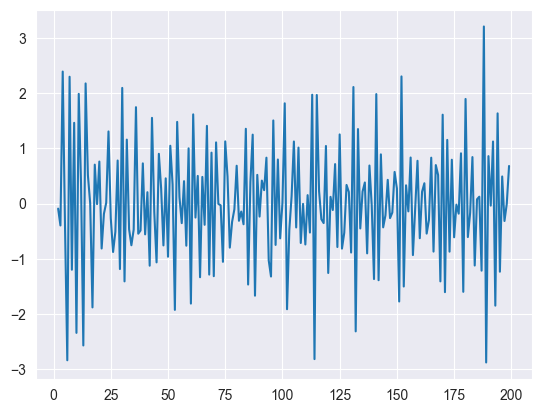

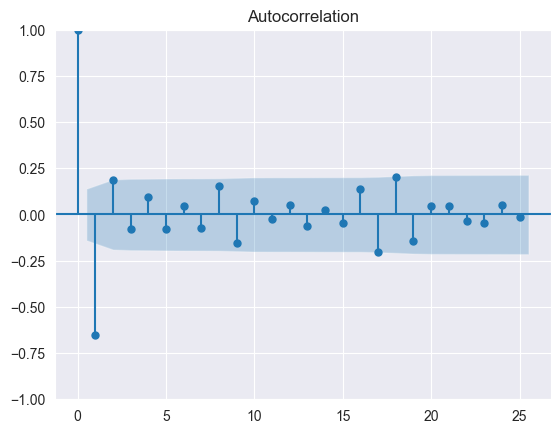

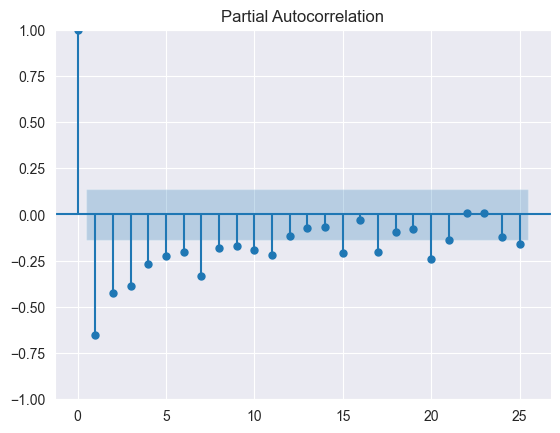

In [91]:
zz = y.diff(1).diff(1).dropna()
plot_graphs(zz, 25)

In [92]:
adf(zz)

ADF test for the original series
Statistic Value: -9.931130787838951
p-value: 2.821017618408916e-17


In [93]:
print('Ljung-Box for zz')
box_test(zz,20)

Ljung-Box for zz


,lb_stat,lb_pvalue
20,138.645144,9.142374e-20


In [94]:
print('Ljung-Box for zz**2')
box_test(zz**2,20)

Ljung-Box for zz**2


,lb_stat,lb_pvalue
20,48.180215,0.000401


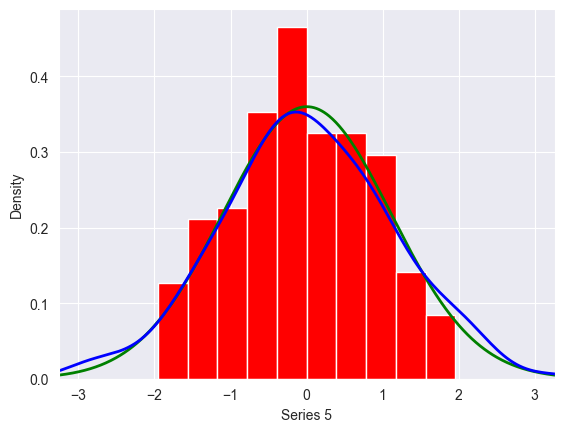

In [95]:
hist(zz,mean=stats['mean'], std=stats['std'])

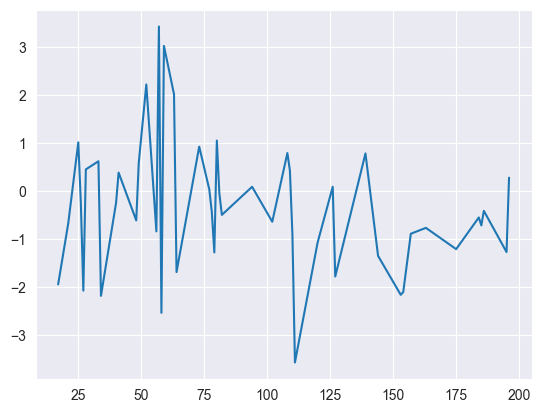

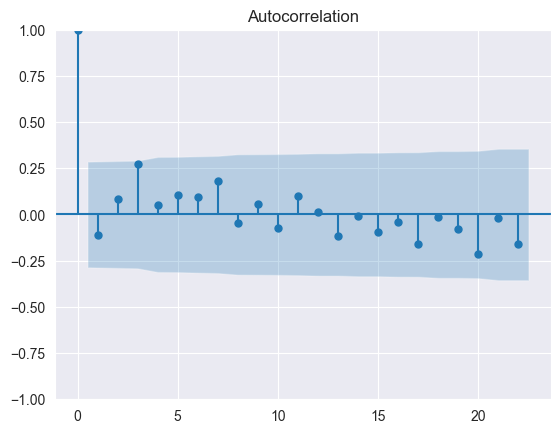

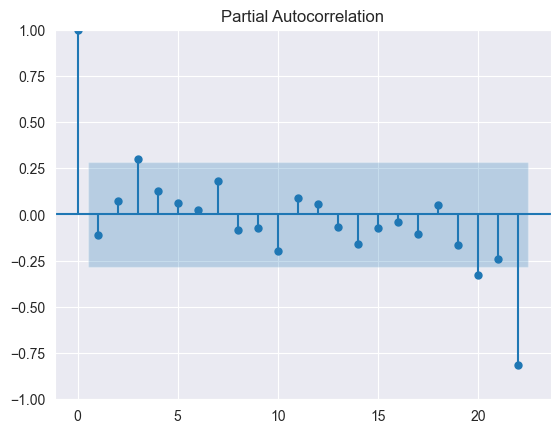

In [96]:
returns = np.log(y).diff().dropna() # we take log first and then one differente, diff(log(spot))
zz = returns
num_lags = 22
plot_graphs(zz, num_lags=num_lags)

In [97]:
adf(zz)

ADF test for the original series
Statistic Value: -2.584934917605888
p-value: 0.09615105993650913


In [98]:
print('Ljung-Box for zz')
box_test(zz,20)

Ljung-Box for zz


,lb_stat,lb_pvalue
20,17.533684,0.618097


In [99]:
print('Ljung-Box for zz**2')
box_test(zz**2,20)

Ljung-Box for zz**2


,lb_stat,lb_pvalue
20,26.558842,0.148138


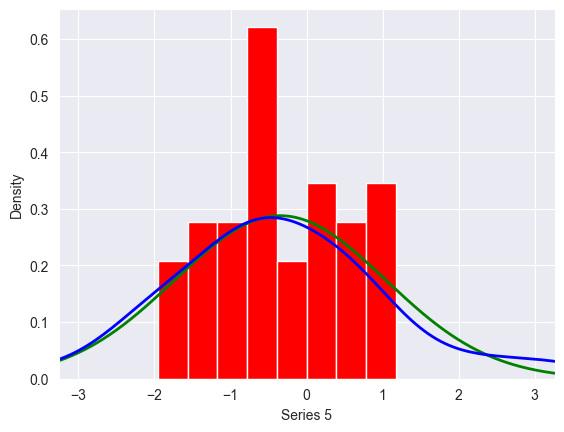

In [100]:
hist(zz,mean=stats['mean'], std=stats['std'])

In [101]:
shap(zz)

Saphiro ShapiroResult(statistic=0.9760391712188721, pvalue=0.44015687704086304)
